<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Notebooks/Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.4.1


# Neural Network Regression with Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: 
- Predicting a numerical variable based on some other combinations of variable's even shorter ---> Predicting a number

### Example's of Regression Problem

* **How much** will this house sell for? 
* **How many** people will buy this app? 
* **How much** will my health insurance be?
* **How much** should I save each week for fuel?

It predicts a number. But there are other problems we can turn it into regression problem. For instance, 
- Trying to predict the **coordinates** of where the boxes should be in a object detection problem. 

### What we're going to cover?

- Architecture of neural network regression model. 
- Input and output shapes of a regression model(features and labels).
- Creating custom data to view and fit. 
- Steps in **modelling**
  - Creating a model.
  - Compiling a model. 
  - Fitting a model. 
  - Evaluating a model. 
- Different Evaluation methods. 
- Saving and loading models 

### **Creating the data to view and fit**

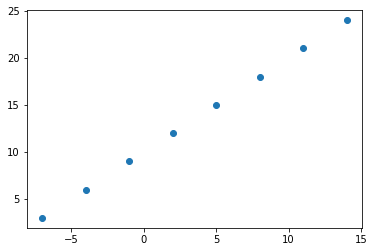

In [2]:
# Importing packages 
import numpy as np 
import matplotlib.pyplot as plt

# Create dummy features 
X = np.array([-7.0 , -4.0 , -1.0 , 2.0 , 5.0 , 8.0 , 11.0 , 14.0])

# Create labels 
y = np.array([3.0 , 6.0 , 9.0 , 12.0 , 15.0 , 18.0 , 21.0 , 24.0])

# Visualizing x and y 
plt.scatter(X , y)

In [3]:
X + 10 # we will get Y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
# This is the relationship between our X and Y, we want our neural net to learn 

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### **Input and Output Shapes**

In [5]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom' , 'bathroom' , 'garage'])
house_price = tf.constant([939700])

house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
 # Input and Output Shape 

input_shape = X.shape 
output_shape = y.shape

input_shape , output_shape

((8,), (8,))

In [7]:
# Taking one sample 
X[0] , y[0] # X[0] --> to predict --> y[0]

(-7.0, 3.0)

In [8]:
# Converting those numpy array into tensors 

X = tf.constant(X)
y = tf.constant(y)

X = tf.cast(X , dtype=tf.float32) 
y = tf.cast(y, dtype=tf.float32)

In [9]:
# Checking the shapes 
input_shape = X[0].shape
output_shape = y[0].shape

input_shape , output_shape

(TensorShape([]), TensorShape([]))

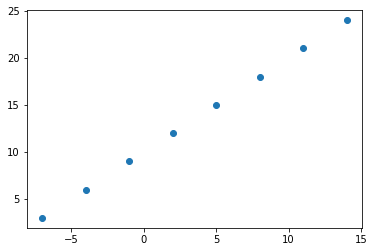

In [10]:
# How might we build a model which will figure out the below relationship? 

plt.scatter(X , y)

## Steps in Modelling with TensorFlow 🛠

1. **Creating a model** --> define the input and output layers, as well as the hidden layers of a neural network. 
2. **Compile our model** --> define the, 
 - loss function (a function which tells us how wrong our model is) more like a metric for our computer to improve the performance. 
 -  the optimizer (tells our model how to improve the patterns it's learning). 
 -  evaluation metrics (what we can use to interpret the performance of our model more like an metric for human to understand).
3. **Fitting a model** --> letting the model to find patterns between X and y (features and labels). 



In [11]:
# Setting the random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1) # In our case we take 1 number and predict 1 number
]) 

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent 
              metrics = ['mae'] )  

# 3. Fitting the model 
model.fit(X , y , epochs = 5) # epochs (how many times you want me to see through your data? )

#

Epoch 1/5
1/1 [==============================] - 1s 681ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# Writing in another format 

# model_add = tf.keras.Sequential()
# model_add.add(tf.keras.layers.Dense(1))


In [13]:
# Try and make predictions with our model 

y_pred = model.predict([17.0]) # X = 17.0
y_pred

array([[12.716021]], dtype=float32)

Our model predicts, if our `X` value is 17.0 then our `y` value should be 12.716021. Well it doesn't make sense, but looking at our loss function it really make sense. 

Our job will be decreasing the loss so that the results converge gradually as we reduce the loss. 

## Improving the model 

When we looked at the steps of modelling in TensorFlow which had those 3 steps, but when it's a time to improve our model. Likewise we can improve our model by going through all these 3 steps / altering them. 

1. **Creating a model** --> here we might, 
  - add more layers.
  - increase the number of hidden units(neurons) within each of hidden layers.
  - change the activation funciton of each layers 

2. **Compiling a model** --> here we might, 
  - change the optimization function 
  - play with the learning rate. 

3. **Fitting a model** --> here we might, 
  - Fit a model for more epochs. 
  - Give the model more data / examples to learn from
  

In [14]:
# Training for 100 epochs, rebuilding our model 

# 1. Creating the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# 3. Fit the model 
model.fit(X , y , epochs = 100)




Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

As we increase the epochs, the loss came down. 

In [15]:
# Remind ourselves of the data 
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model predictions has been improved 
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
# Making certain changes in the model and let's see how it goes 

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , activation='relu'),                           
    tf.keras.layers.Dense(1) 
])

# 2. Compiling the model 
model.compile(loss=tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae'])

# Fitting the model 
model.fit(X , y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 441ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - 

In [18]:
# Let's predict our model and see what's the improvement 

model.predict([17.0])

array([[31.223137]], dtype=float32)

Seems the model is overfitting, it learns well in the training data but during prediction or coming across new examples it does worse than our previous model.

Not everything considered as a improvement, sometimes the metrics aren't representative of our output / needs. 

In [19]:
# Making changes again removing and adding things 

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50 , activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam(lr = 0.01) , 
              metrics = ['mae'])

# 3. Fitting the model 
model.fit(X , y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 561ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1378 - mae: 10.1378
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [20]:
# Let's see our data 
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# This model should be good since the loss is really low 
# Making predictions to see how positive the improvements are 

model.predict([20.0]) , model.predict([23.0])

(array([[31.03802]], dtype=float32), array([[34.185913]], dtype=float32))

## Evaluating the model 

In practice, a typical workflow we go through while building neural networks are: 

```
Build a model --> Fit it --> Evaluate it --> tweak a model --> Fit it --> Evaluate it --> tweak a model --> fit it --> Evaluate it....... 
```
When we it comes to evaluation ... there are 3 words we should memorize: 

```
Visualize <--> Visualize <--> Visualize
```
It's good idea to visualize:
* The data, 
  - What data we are working with?
  - What does it look like? 
* The model: 
  - What does our model look like? 
* The training of a model,
  - How does a model perform while it learns? 
* The predictions of the model, 
  - How does the model's predictiosn line up against the ground truth (the original labels). 


In [22]:
# Make a bigger dataset

X = tf.range(-100 , 100 , 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Making a label for our dataset 

y = X + 10 # this is the pattern we want our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Let's do those above steps one by one! 

#### **Visualize the data**

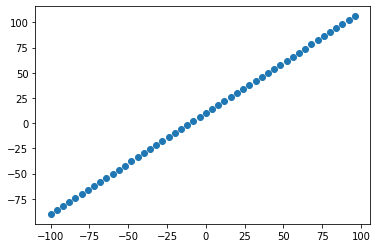

In [24]:
import matplotlib.pyplot as plt

# Plotting our data 
plt.scatter(X , y)

#### Splitting our data into sets 

In [25]:
# from sklearn.model_selection import train_test_split

# X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shape of those sets 
#print(f'The shape of X training set: {X_train.shape}')
#print(f'The shape of X test set: {X_test.shape}')
#print(f'The shape of y training set: {y_train.shape}')
#print(f'The shape of y test set: {y_test.shape}')

# Can't figure the error for now, maybe it's too small? 

In [26]:
# Split the data into train and test split 

# First 40 samples (80%)
X_train = X[:40]
y_train = y[:40]

# Last 10 samples (20%)
X_test = X[40:]
y_test = y[40:]

print(f'The shape of X training set: {X_train.shape}')
print(f'The shape of X test set: {X_test.shape}')
print(f'The shape of y training set: {y_train.shape}')
print(f'The shape of y test set: {y_test.shape}')


The shape of X training set: (40,)
The shape of X test set: (10,)
The shape of y training set: (40,)
The shape of y test set: (10,)


#### Visualize the training and test set! 

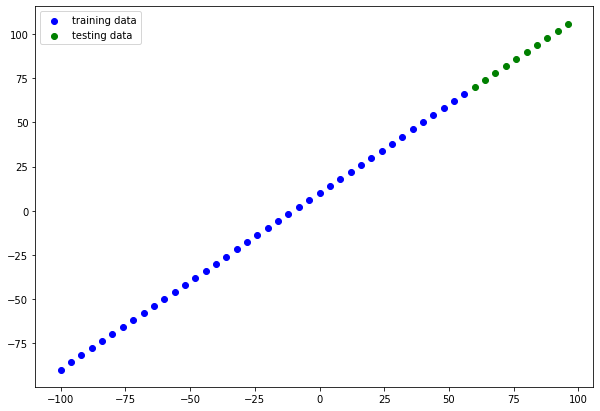

In [27]:
# Plotting 
plt.figure(figsize=(10 , 7))

# Training data in blue 
plt.scatter(X_train , y_train , c ='b' , label = 'training data') 

# Testiing data in green
plt.scatter(X_test , y_test , c='g' , label = 'testing data') 

# Show legend 
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data 

# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# 3. Fit the model 
# model.fit(X_train , y_train , epochs=100)


We have instantiate the model now rather fitting it to the mode, lets visualize it 

#### **Visualize the model**

In [29]:
# checking the summary / how our model built 

# model.summary() # Throws ERROR

In [30]:
# Getting over the error, we should build our model 

# model.build()

But we can do better, like create model which builts automatically by defining the `input_shape` argument in the first layer itself. 

In [31]:
# Checking the shape of our input data 

X[0] , y[0] # It's gonna be just 1 number, depends upon the variable's 

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [32]:
# Defining the input_shape
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 , input_shape =[1] )
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])


In [33]:
# Checking our model's summary 

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- **Total Params** --> total number of parameters in the model. 
- **Trainable params** --> these are the parameters (patterns model can update as they learn)
- **Non-trainable params** --> these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during `transfer learning`

In [34]:
# Fitting the model to training data 

model.fit(X_train , y_train , epochs = 100 , verbose = 0)

In [35]:
# Creating a model and playing around with the dense layers 

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100 , activation=None , input_shape= [1]),
  tf.keras.layers.Dense(10 , input_shape = [1] , name = 'input_layer') , 
  tf.keras.layers.Dense(1 , name = 'output_layer')
] , name = 'model_1')

model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.SGD() , 
              metrics = ['mae'])

# Getting the summary of our model / how it's built 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fitting this model 
model.fit(X_train , y_train , epochs = 100 , verbose = 0)

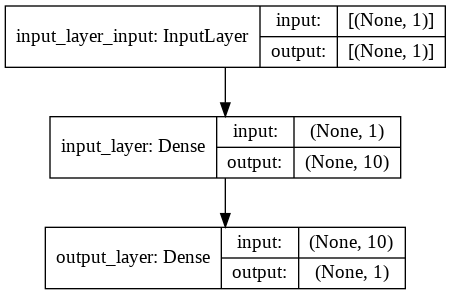

In [37]:
# Plotting the model with tensorflow plot_model utils

from tensorflow.keras.utils import plot_model
plot_model(model = model , show_shapes=True)

### **Visualizing our model's predictions**